<a href="https://colab.research.google.com/github/thanaprondtn/python_dataviz2024/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW9 present radar chart data india

## นำเข้าข้อมูล

In [ ]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/data_viz_2024_DATA'

In [ ]:
movie_df = pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1')
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


#จัดการข้อมูล

In [ ]:
movie_df = movie_df.isnull().sum()
print(movie_df[movie_df > 0].sort_values(ascending=False))

Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
dtype: int64


In [ ]:
#drop ค่า null
movie_df = pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1') # Reload the DataFrame
movie_df = movie_df.dropna(subset=['Rating', 'Genre', 'Votes', 'Director'])

In [ ]:
#หลัง dropna แล้วข้อมูลเหลือกี่ % จากเดิม
print(f"ข้อมูลเหลือ {(len(movie_df) / len(pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 50.37% จากเดิม


In [ ]:
# แปลงคอลัมน์ Duration เป็นตัวเลข
movie_df['Duration'] = pd.to_numeric(movie_df['Duration'].str.replace(' min', ''), errors='coerce')

# คำนวณค่าเฉลี่ยของ Duration ที่ไม่ใช่ NaN
duration_mean = movie_df['Duration'].mean()

# แทนที่ค่า NaN ด้วยค่าเฉลี่ย
movie_df['Duration'] = movie_df['Duration'].fillna(duration_mean)

In [ ]:
movie_df['Actor 1'] = movie_df['Actor 1'].fillna('Unknown')
movie_df['Actor 2'] = movie_df['Actor 2'].fillna('Unknown')
movie_df['Actor 3'] = movie_df['Actor 3'].fillna('Unknown')

In [ ]:
movie_df['Votes'] = movie_df['Votes'].str.replace(',', '').astype(int)

In [ ]:
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.00000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.00000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.00000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.00000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.00000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),132.25348,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125.00000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),132.25348,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129.00000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


#ต้องการเปรียบเทียบ Director ที่ทำหนังประเภท Drama กับ Action โดยมีตัวชี้วัด ดังนี้


*   Genre_Count: จำนวนหนังในแต่ละประเภท
*   Popularity: ความนิยมเฉลี่ยของหนัง (Rating/Votes)
*   Duration_Mean: ความยาวเฉลี่ยของหนัง
*   Top_Actor_Count: จำนวนนักแสดงที่มีความนิยมสูงกว่าค่าเฉลี่ย
*   Remake_Movies: จำนวนหนังที่นำมา remake (ดูเรื่องที่ซ้ำ)








In [ ]:
movie_df.describe()

,Duration,Rating,Votes
count,7812.000000,7812.000000,7812.000000
mean,132.253480,5.839196,1964.894777
std,22.922403,1.381314,11679.410017
min,21.000000,1.100000,5.000000
25%,123.000000,4.900000,17.000000
50%,132.253480,6.000000,57.000000
75%,143.000000,6.800000,420.000000
max,321.000000,10.000000,591417.000000


In [ ]:
# ฟังก์ชันคำนวณ Popularity
def calculate_popularity(rating, votes, min_votes=5):
    return (rating * votes) / (votes + min_votes)

# คำนวณ Popularity
movie_df['Popularity'] = movie_df.apply(lambda row: calculate_popularity(row['Rating'], row['Votes']), axis=1)

In [ ]:
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Popularity
1,#Gadhvi (He thought he was Gandhi),(2019),109.00000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,4.307692
3,#Yaaram,(2019),110.00000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,3.850000
5,...Aur Pyaar Ho Gaya,(1997),147.00000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.671755
6,...Yahaan,(2005),142.00000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.366086
8,?: A Question Mark,(2012),82.00000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.515408
...,...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),132.25348,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,5.110714
15503,Zulm Ki Zanjeer,(1989),125.00000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.208163
15504,Zulm Ko Jala Doonga,(1988),132.25348,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,3.162500
15505,Zulmi,(1999),129.00000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,4.465909


In [ ]:
# คำนวณ 75th percentile ของ Popularity จากข้อมูลทั้งหมด
popularity_threshold = movie_df['Popularity'].quantile(0.75)
popularity_threshold

6.25186598812553

In [ ]:
# แยกข้อมูลเป็นหนัง Drama และ Action
drama_df = movie_df[movie_df['Genre'].str.contains('Drama', na=False)]
action_df = movie_df[movie_df['Genre'].str.contains('Action', na=False)]

In [ ]:
# ฟังก์ชันนับจำนวนนักแสดงที่มี Popularity สูงกว่า threshold
def count_top_actors(df, threshold):
    top_actors = set()
    for col in ['Actor 1', 'Actor 2', 'Actor 3']:
        actor_popularity = df.groupby(col)['Popularity'].mean()
        top_actors.update(actor_popularity[actor_popularity > threshold].index)
    return len(top_actors), list(top_actors)

In [ ]:
# คำนวณสำหรับ Drama และ Action แยกกัน
drama_top_actor_count, drama_top_actors = count_top_actors(drama_df, popularity_threshold)
action_top_actor_count, action_top_actors = count_top_actors(action_df, popularity_threshold)

In [ ]:
# ฟังก์ชันคำนวณสรุปข้อมูล
def calculate_summary(movie_df, genre, threshold):
    genre_count = movie_df['Name'].count()
    popularity = movie_df['Popularity'].mean()
    duration_mean = movie_df['Duration'].mean()
    top_actor_count, _ = count_top_actors(movie_df, threshold)
    remake_count = movie_df['Name'].duplicated(keep=False).sum()

    return pd.Series({
        'Genre': genre,
        'Genre_Count': genre_count,
        'Popularity': popularity,
        'Duration_Mean': duration_mean,
        'Top_Actor_Count': top_actor_count,
        'Remake_Movies': remake_count
    })

# คำนวณสรุปข้อมูลสำหรับ Drama และ Action
drama_summary = calculate_summary(drama_df, 'Drama', popularity_threshold)
action_summary = calculate_summary(action_df, 'Action', popularity_threshold)

# สร้างตารางสรุป
summary = pd.DataFrame([drama_summary, action_summary])
summary.set_index('Genre', inplace=True)

print("Summary Table:")
summary

Summary Table:


,Genre_Count,Popularity,Duration_Mean,Top_Actor_Count,Remake_Movies
Genre,,,,,
Drama,4922,5.302544,133.834568,1326,494
Action,2355,4.793741,139.855429,358,200


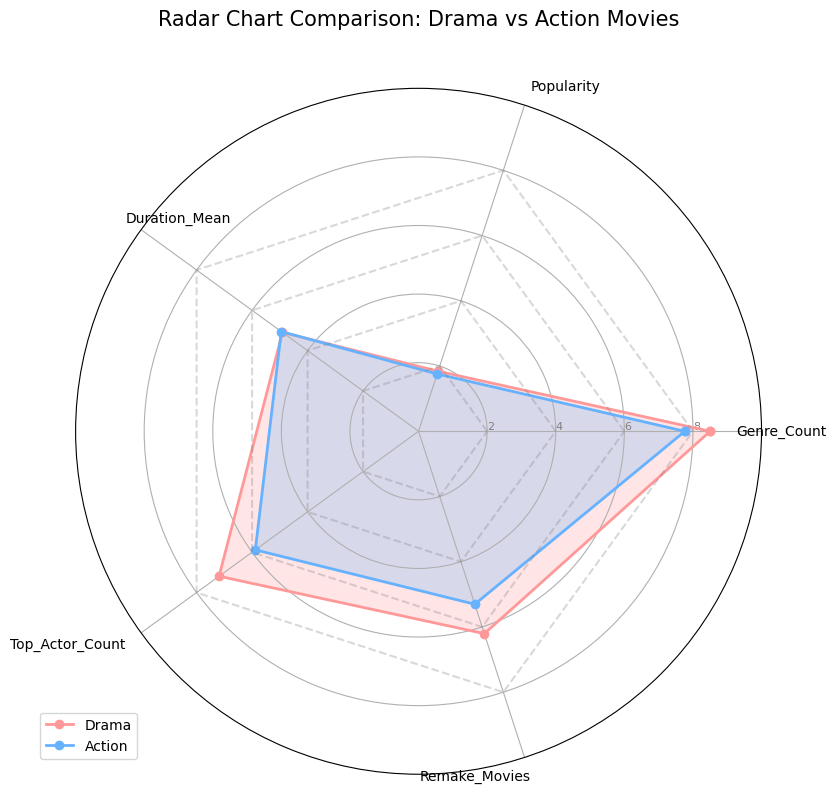

In [ ]:
# สร้าง Radar Chart
categories = ['Genre_Count', 'Popularity', 'Duration_Mean', 'Top_Actor_Count', 'Remake_Movies']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

colors = ['#FF9999', '#66B2FF']

for i, genre in enumerate(summary.index):
    values = summary.loc[genre, categories].values.flatten().tolist()
    values += values[:1]

    values = np.log1p(values)

    ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=genre)
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)
ax.set_yticklabels([])

ax.set_rlabel_position(0)
plt.yticks([2, 4, 6, 8], ["2", "4", "6", "8"], color="grey", size=8)
plt.ylim(0, 10)

for y in np.arange(2, 10, 2):
    plt.polar(angles, [y]*len(angles), '--', color='grey', alpha=0.3)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Radar Chart Comparison: Drama vs Action Movies", size=15, y=1.08)
plt.tight_layout()
plt.show()

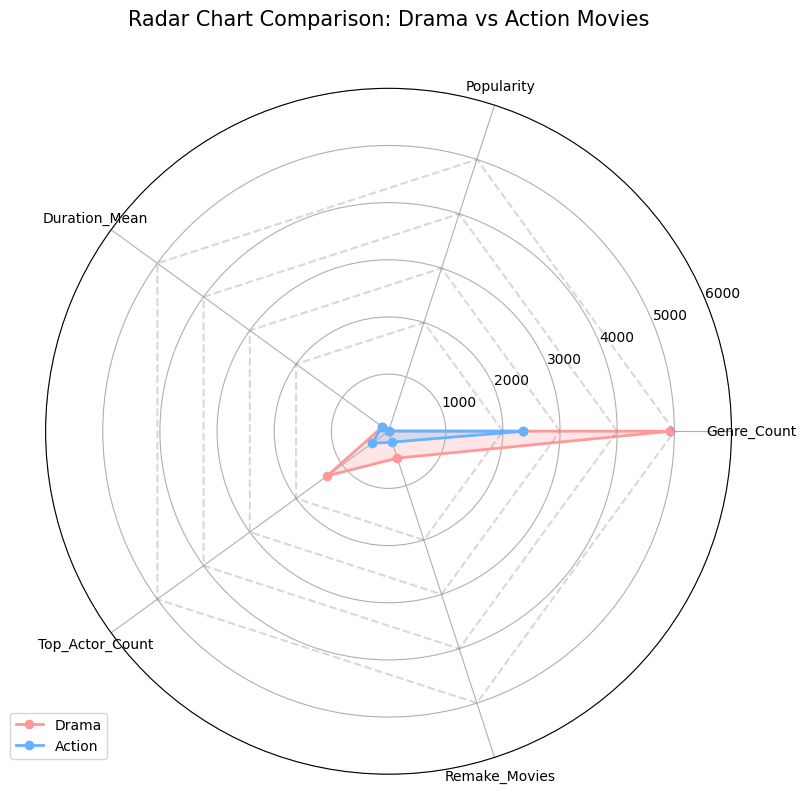

In [ ]:
# สร้าง Radar Chart
categories = ['Genre_Count', 'Popularity', 'Duration_Mean', 'Top_Actor_Count', 'Remake_Movies']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

colors = ['#FF9999', '#66B2FF']

for i, genre in enumerate(summary.index):
    values = summary.loc[genre, categories].values.flatten().tolist()
    values += values[:1]

    # ไม่ใช้ np.log1p ในการแปลงค่า
    ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=genre)
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)

# ปรับแกนรัศมีให้เหมาะสมกับข้อมูล
ax.set_ylim(0, max(summary[categories].max()) * 1.1)

# เพิ่มเส้นตารางวงกลม
yticks = ax.get_yticks()
ax.set_yticks(yticks)
for y in yticks[1:-1]:  # ไม่รวม 0 และค่าสุดท้าย
    plt.polar(angles, [y] * len(angles), '--', color='grey', alpha=0.3)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Radar Chart Comparison: Drama vs Action Movies", size=15, y=1.08)
plt.tight_layout()
plt.show()